In [29]:
#작업 환경 설정 

In [30]:
import pandas as pd
import matplotlib.pylab as plt
import missingno as msno

In [31]:
#csv 파일 데이터 로드 

In [32]:
data =pd.read_csv("data.csv")

In [33]:
data.tail()

,Unnamed: 0,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Diversity Spotlight (US Only),Estimated Revenue Range,Operating Status,...,Number of Founders,Founders,Number of Employees,Number of Funding Rounds,Funding Status,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Funding Type
23354,23354,MHP Cheltenham,https://www.crunchbase.com/organization/mhp-ch...,"Health Care, Medical","Penn Valley, California, United States",MHP Cheltenham is a health care company.,"225,891",NaN,NaN,Active,...,NaN,NaN,NaN,1,Seed,2018-10-02,350000,USD,350000,Seed
23355,23355,South Tea Transportation,https://www.crunchbase.com/organization/south-...,Transportation,"Las Vegas, Nevada, United States",South Tea Transportation is a stealth transpor...,"275,675",NaN,NaN,Active,...,NaN,NaN,NaN,1,Seed,2018-09-24,50000,USD,50000,Seed
23356,23356,Regenevida,https://www.crunchbase.com/organization/regene...,"Biotechnology, Health Care","Saint Paul, Minnesota, United States",Regenevida has improving human health thru adv...,"275,950",NaN,NaN,Active,...,NaN,NaN,NaN,1,NaN,2018-09-06,7358,USD,7358,Undisclosed
23357,23357,Flying Frog,https://www.crunchbase.com/organization/flying...,"Property Management, Renewable Energy","Freeport, Illinois, United States",Flying Frog owns and leases commercial property.,"280,660",NaN,NaN,Closed,...,NaN,NaN,NaN,1,NaN,2018-08-21,19496,USD,19496,Grant
23358,23358,Intergalactic Media Group,https://www.crunchbase.com/organization/interg...,Information Technology,"Longwood, Florida, United States",Intergalactic Media Group is a technology comp...,"355,344",NaN,NaN,Active,...,NaN,NaN,NaN,1,Seed,2018-09-19,10000,USD,10000,Seed


In [34]:
#결측값 수치적으로 확인해보기

In [35]:
(data.isnull().sum())

Unnamed: 0                                   0
Organization Name                            2
Organization Name URL                        0
Industries                                 279
Headquarters Location                        0
Description                                  0
CB Rank (Company)                            0
Diversity Spotlight (US Only)            23065
Estimated Revenue Range                   7830
Operating Status                             0
Founded Date                               396
Founded Date Precision                     396
Company Type                              6721
Number of Articles                        9898
Industry Groups                            467
Number of Founders                        4348
Founders                                  4348
Number of Employees                       1368
Number of Funding Rounds                     0
Funding Status                            7814
Last Funding Date                            0
Last Funding 

In [36]:
#결측값 시작적 확인해보기

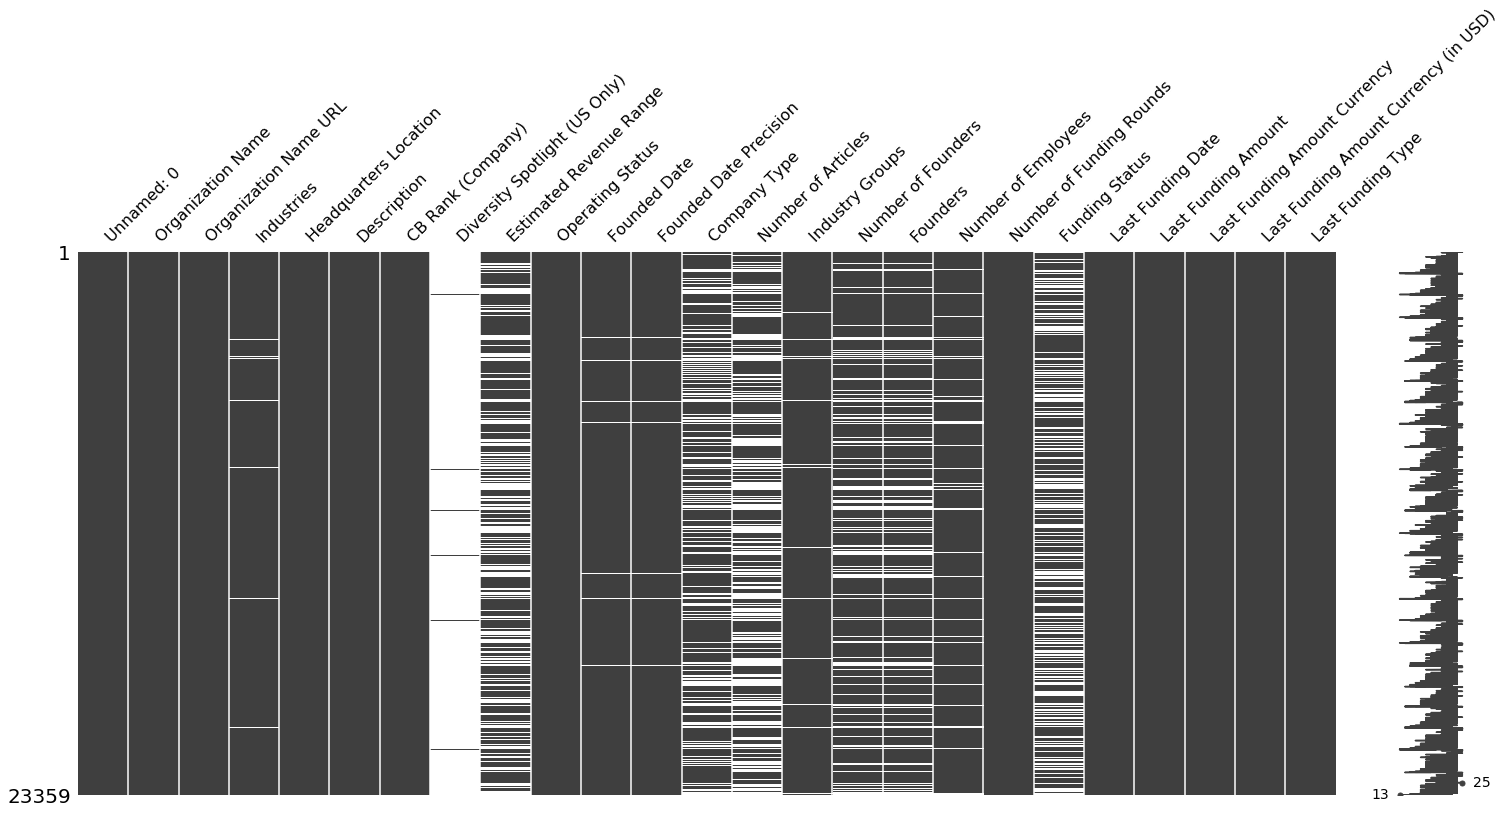

In [37]:
msno.matrix(data)
plt.show()

In [38]:
#논문에서 스타트업 성공 정의 - M&A , IPO
#성공은 1 아닌건 0
#funding status열 에서 M&A,IPO 한 기업들만 success열에 넣기
data["success"]=data["Funding Status"].isin(['M&A', 'IPO']).astype(int)

In [39]:
#총데이터 갯수
len(data)

23359

In [40]:
#성공했다는 기업들의 바율 : 편향성이 심해 보임 
(data["success"]==1).sum()/len(data)

0.08275183012971446

In [41]:
#쓸모 없어진 열들은 제거하기 
#변수 이름에 빈칸이 있으면 오류가 나서 변수 이름에 

In [42]:
data.columns = data.columns.str.replace(' ', '')

In [43]:
data.drop(["FundingStatus","Unnamed:0"], axis='columns', inplace=True)

In [44]:
#지금까지 데이터 
data.tail()

,OrganizationName,OrganizationNameURL,Industries,HeadquartersLocation,Description,CBRank(Company),DiversitySpotlight(USOnly),EstimatedRevenueRange,OperatingStatus,FoundedDate,...,NumberofFounders,Founders,NumberofEmployees,NumberofFundingRounds,LastFundingDate,LastFundingAmount,LastFundingAmountCurrency,LastFundingAmountCurrency(inUSD),LastFundingType,success
23354,MHP Cheltenham,https://www.crunchbase.com/organization/mhp-ch...,"Health Care, Medical","Penn Valley, California, United States",MHP Cheltenham is a health care company.,"225,891",NaN,NaN,Active,NaN,...,NaN,NaN,NaN,1,2018-10-02,350000,USD,350000,Seed,0
23355,South Tea Transportation,https://www.crunchbase.com/organization/south-...,Transportation,"Las Vegas, Nevada, United States",South Tea Transportation is a stealth transpor...,"275,675",NaN,NaN,Active,NaN,...,NaN,NaN,NaN,1,2018-09-24,50000,USD,50000,Seed,0
23356,Regenevida,https://www.crunchbase.com/organization/regene...,"Biotechnology, Health Care","Saint Paul, Minnesota, United States",Regenevida has improving human health thru adv...,"275,950",NaN,NaN,Active,2014-01-01,...,NaN,NaN,NaN,1,2018-09-06,7358,USD,7358,Undisclosed,0
23357,Flying Frog,https://www.crunchbase.com/organization/flying...,"Property Management, Renewable Energy","Freeport, Illinois, United States",Flying Frog owns and leases commercial property.,"280,660",NaN,NaN,Closed,NaN,...,NaN,NaN,NaN,1,2018-08-21,19496,USD,19496,Grant,0
23358,Intergalactic Media Group,https://www.crunchbase.com/organization/interg...,Information Technology,"Longwood, Florida, United States",Intergalactic Media Group is a technology comp...,"355,344",NaN,NaN,Active,NaN,...,NaN,NaN,NaN,1,2018-09-19,10000,USD,10000,Seed,0


In [ ]:
#todo 
NAN값 처리 , 가중치